In [1]:
import pandas as pd

In [2]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    #colors = getattr(getattr(pd.plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))
    colors = ['c', 'm', 'k', 'r', 'g', 'b',]
    
    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], figsize=(15,5), **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax

In [32]:
def analyse_trade_data(i):
    ''' 
    This method analyses a given d3a simulation file using the input 1,2,3 as the data is structured in the /Datasets folder
    884K    ./Datasets/d3a-simulation-data/simulation2
    884K    ./Datasets/d3a-simulation-data/simulation3
    1.2M    ./Datasets/d3a-simulation-data/simulation1
    '''
    trade_df = pd.read_csv('../Datasets/d3a-simulation-data/simulation%s/Grid_trades.csv' %(i))
    f = lambda x: " ".join(x.split("T"))
    trade_df['datetime'] = trade_df['slot'].apply(f)
    trade_df.set_index(pd.to_datetime(trade_df.datetime), drop=True, inplace=True)
    trade_df.drop(columns=['slot', 'datetime'], inplace=True)
    features = ['rate [ct./kWh]', 'energy [kWh]']
    print('Unique entities trading between each other: ', trade_df.buyer.unique(), trade_df.seller.unique())
    resampled_df = pd.DataFrame(trade_df['energy [kWh]'].resample('15T').sum())
    resampled_df['rate [ct./kWh]'] = trade_df['rate [ct./kWh]'].resample('15T').mean()
    plot_multi(resampled_df, cols=features)
    print('Min kWh volume in each 15-min window: ', resampled_df[features[1]].min())
    print('Max kWh volume in each 15-min window: ', resampled_df[features[1]].max())
    print('Average kWh volume in each 15-min window: ', resampled_df[features[1]].mean())

Unique entities trading between each other:  ['IAA ZIP code' 'Market Maker'] ['Market Maker' 'IAA ZIP code']
Min kWh volume in each 15-min window:  0.0
Max kWh volume in each 15-min window:  18.0662665
Average kWh volume in each 15-min window:  4.071582902529761


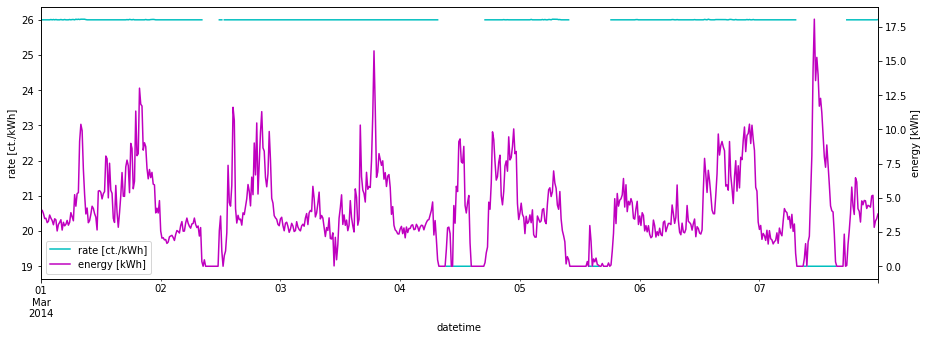

In [33]:
analyse_trade_data(1)

Unique entities trading between each other:  ['IAA ZIP code' 'Market Maker'] ['Market Maker' 'IAA ZIP code']
Min kWh volume in each 15-min window:  0.0
Max kWh volume in each 15-min window:  15.435663500000002
Average kWh volume in each 15-min window:  3.645424380580359


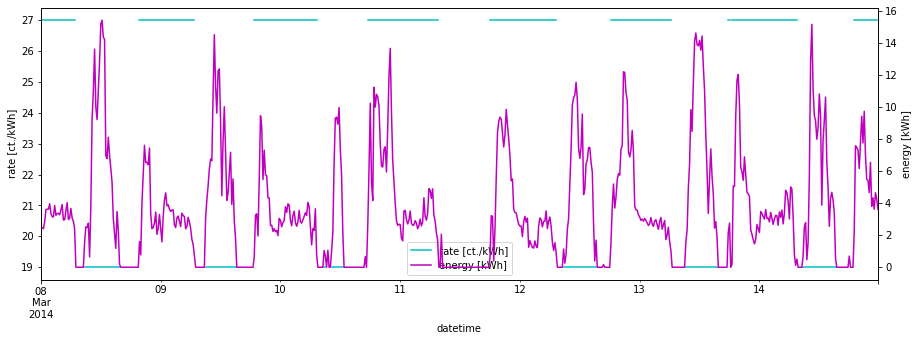

In [34]:
analyse_trade_data(2)

Unique entities trading between each other:  ['IAA ZIP code' 'Market Maker'] ['Market Maker' 'IAA ZIP code']
Min kWh volume in each 15-min window:  0.0
Max kWh volume in each 15-min window:  16.322489999999995
Average kWh volume in each 15-min window:  3.4557902708333352


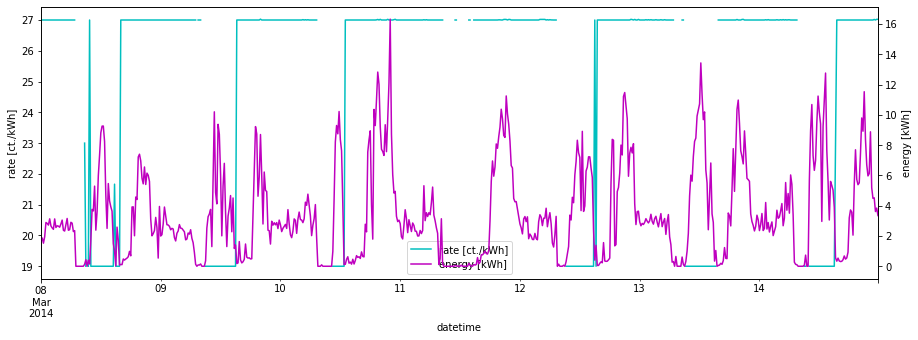

In [35]:
analyse_trade_data(3)